In [128]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
from pathlib import Path
from tqdm.notebook import tqdm

In [136]:
def plot(df, level, val):
    m = {
        "Group": "Subclass",
        "Subclass": "Class",
        "Class": "Section",
    }
    if level not in m:
        distr = df[level].value_counts()
        print(distr)
        distr.sort_index().plot(kind='bar')
        plt.xlabel('Год')
        plt.ylabel('Число патентов')
        plt.title(f'Распределение патентов по {level}')
        plt.show()
        return
    distr = df[df[m[level]] == val][level].value_counts()
    print(distr)
    distr.sort_index().plot(kind='bar')
    plt.xlabel('Год')
    plt.ylabel('Число патентов')
    plt.title(f'Распределение патентов {m[level]} {val} по {level}')
    plt.show()


In [137]:
def get_data(year: int) -> pd.DataFrame:
    return pd.read_csv(f"years/{year}.csv")

def filter(df: pd.DataFrame, level: str, vals: list[str]) -> pd.DataFrame:
    return df[df[level].isin(vals)]

def limiter(df: pd.DataFrame, level: str, percent: float) -> pd.DataFrame:
    return train_test_split(df, train_size=percent, stratify=df[level], shuffle=True)[0]

In [138]:
p2000 = get_data(2000)

In [139]:
def balance(abc: pd.DataFrame, level: str, sublevel: str, value: str, lower_bound: int, upper_bound: int) -> pd.DataFrame:
    df = abc.copy()
    distr = df[df[level] == value][sublevel].value_counts()
    df = df[~df[sublevel].isin(distr[distr < lower_bound].index)]
    higher_groups = distr[distr > upper_bound].index
    for group in higher_groups:
        excess_records = distr[group] - int(upper_bound)
        drop_indices = df[df[sublevel] == group].sample(n=excess_records, random_state=42).index
        df = df.drop(drop_indices)
    return df


In [165]:
df = p2000.copy()
sublevel = "Section"
distr = df[sublevel].value_counts()
df = df[~df[sublevel].isin(distr[distr < 1000].index)]
higher_groups = distr[distr > 6000].index
for group in higher_groups:
    excess_records = distr[group] - int(6000)
    drop_indices = df[df[sublevel] == group].sample(n=excess_records, random_state=42).index
    df = df.drop(drop_indices)
p2000 = df.copy()

Section
G    6000
H    6000
B    5511
A    3359
F    1285
C    1207
Name: count, dtype: int64


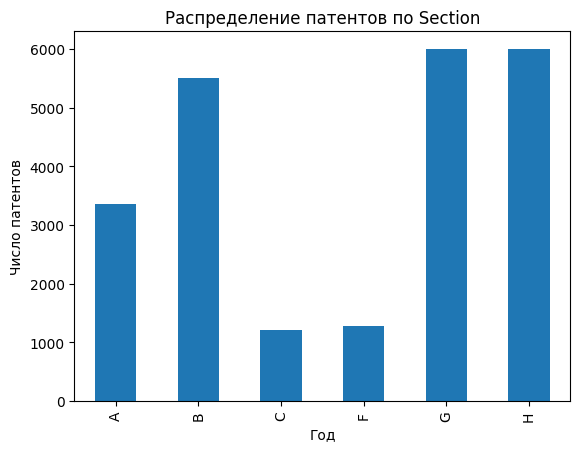

In [166]:
plot(df, "Section", None)

In [158]:
p2000 = balance(p2000, "Section", "Class", "G", 660, 3000)

Class
G06    909
G01    895
G07    872
G09    819
G10    726
G11    563
G08    551
G05    444
G03    221
Name: count, dtype: int64


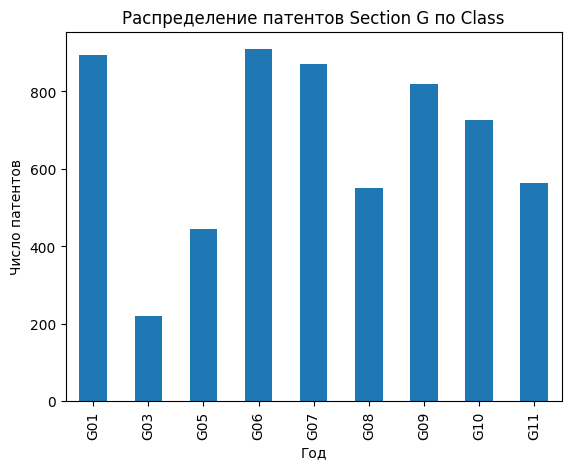

In [167]:
plot(p2000, "Class", "G")

In [155]:
p2000 = balance(p2000, "Class", "Subclass", "G06", 700, 3000)

Subclass
G06Q    248
G06F    232
G06K    222
G06T    151
G06G     56
Name: count, dtype: int64


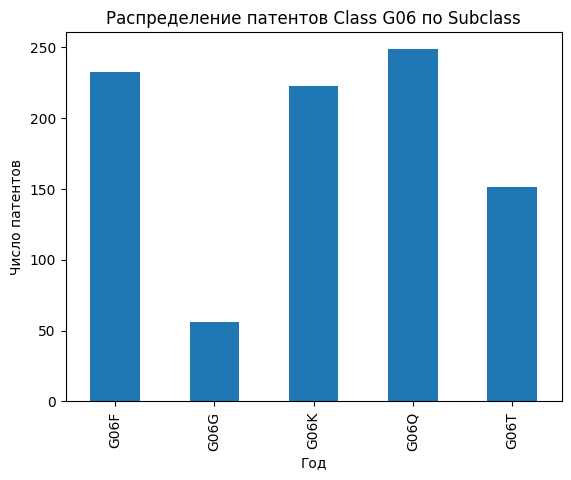

In [168]:
plot(p2000, "Subclass", "G06")

Group
G06F-013    31
G06F-012    30
G06F-003    29
G06F-009    28
G06F-007    27
G06F-015    22
G06F-019    20
G06F-017    16
G06F-000    13
G06F-001     7
G06F-011     7
G06F-021     2
Name: count, dtype: int64


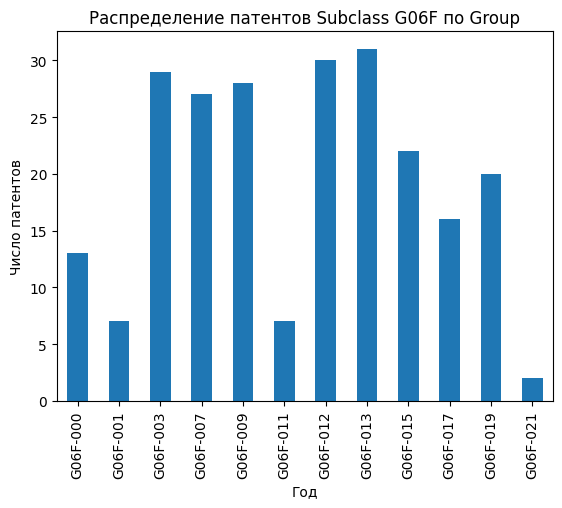

In [169]:
plot(p2000, "Group", "G06F")

Group
G06F-007    3000
G06F-003    3000
G06F-017    3000
G06F-013    3000
G06F-015    3000
G06F-012    2711
G06F-019    2615
G06F-009    2113
G06F-000    1541
G06F-021     974
G06F-001     950
G06F-011     779
Name: count, dtype: int64


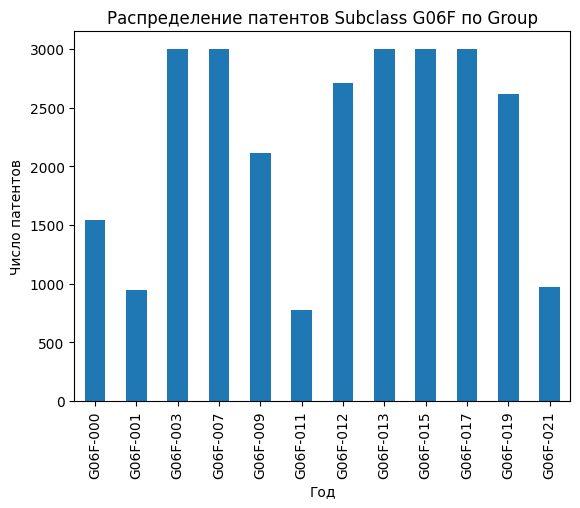

In [152]:
p2000 = balance(p2000, "Subclass", "Group", "G06F", 700, 3000)
plot(p2000, "Group", "G06F")

In [170]:
p2000.to_csv('filtered/2000.csv', index=False)


In [176]:
p2010 = get_data(2010)

Section
G    99648
H    22766
B     6280
A     3180
F     1951
C      858
E      759
D      120
Name: count, dtype: int64


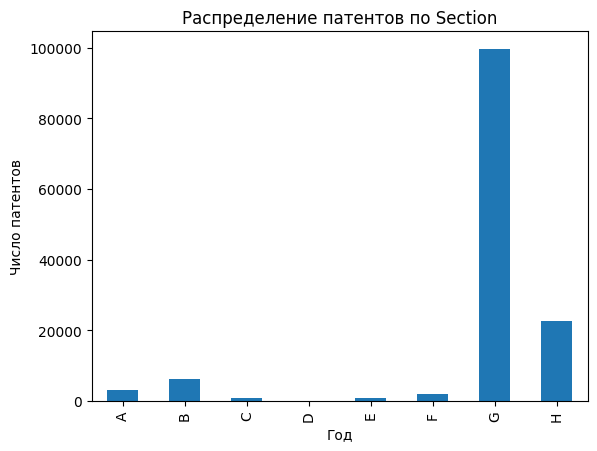

In [177]:
plot(p2010, "Section", None)

In [187]:
p2010 = balance(p2010, "Section", "Class", "G", 700, 4000)

Class
G06    4000
G01    4000
G10    1863
G05    1623
G09    1555
G11    1352
G08    1232
G07     774
Name: count, dtype: int64


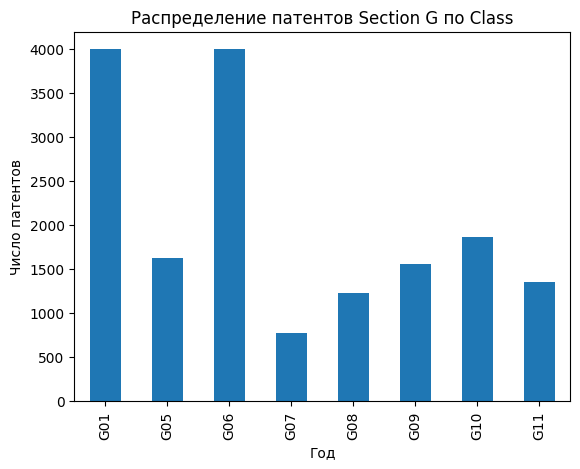

In [188]:
plot(p2010, "Class", "G")

In [184]:
p2010 = balance(p2010, "Class", "Subclass", "G06", 800, 5000)

Subclass
G06F    5000
G06Q    5000
G06K    2800
G06T    1742
G06G    1335
G06N     894
Name: count, dtype: int64


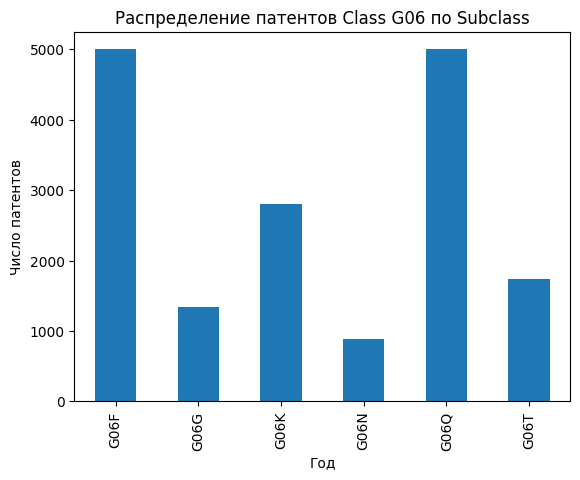

In [185]:
plot(p2010, "Subclass", "G06")

In [181]:
p2010 = balance(p2010, "Subclass", "Group", "G06F", 1000, 4000)

Group
G06F-007    4000
G06F-021    4000
G06F-003    4000
G06F-017    4000
G06F-015    4000
G06F-009    3839
G06F-012    2084
G06F-019    1994
G06F-013    1793
G06F-011    1719
G06F-000    1594
Name: count, dtype: int64


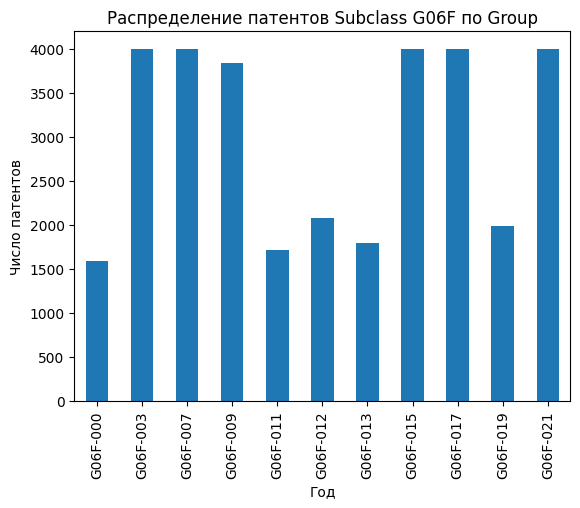

In [182]:
plot(p2010, "Group", "G06F")